In [1]:
#Importing Libraries
import pandas as pd    #pandas
import numpy as np    #numpy
import re

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

In [2]:
#Loading Dataset: Dataset 3 from research paper
df_test = pd.read_csv("E:/Mini_project_datasets/test_mini_separated.csv")
df_train = pd.read_csv("E:/Mini_project_datasets/train_mini_separated.csv")

Exploratory Data Analysis on the Dataset



In [3]:
print("Test Data: \n",df_test.head(5))
print("Train Data: \n",df_train.head(5))

Test Data: 
    label                                            comment
0      0  This is a great book: I must preface this by s...
1      1  Huge Disappointment.: As a big time, long term...
2      0  Wayne is tight but cant hang with Turk.: This ...
3      0  Excellent: I read this book when I was in elem...
4      1  Not about Anusara: Although this book is toute...
Train Data: 
    label                                            comment
0      1  Very Mediocre: The fake velvet touch only enha...
1      0  Downton Abbey: I love it love it love it. I wo...
2      1  Roses Are Red: Disappointed in this one. They ...
3      1  Awful Experience: This Microsoft mouse stopped...
4      1  I must have seen a different movie: I have one...


In [4]:
#Checking data dimensionality, feature names, and feature types.
print("Shape of test dataset",df_test.shape)
print("Shape of train dataset",df_train.shape)

Shape of test dataset (80000, 2)
Shape of train dataset (320000, 2)


In [5]:
print("General Information of test dataset",df_test.info())
print("General Information of train dataset",df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    80000 non-null  int64 
 1   comment  80000 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.2+ MB
General Information of test dataset None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320000 entries, 0 to 319999
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   label    320000 non-null  int64 
 1   comment  320000 non-null  object
dtypes: int64(1), object(1)
memory usage: 4.9+ MB
General Information of train dataset None


In [6]:
print(df_test.describe())
print(df_train.describe())

              label
count  80000.000000
mean       0.498700
std        0.500001
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
               label
count  320000.000000
mean        0.500325
std         0.500001
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000


In [7]:
#This function cleans up text so that only English characters are preserved
def processed_comments(df, text_column):
    not_alphanumeric = re.compile(r'[\W]')
    not_ascii = re.compile(r'[^a-z0-1\s]')
    
    processed_comments = []
    for comment in df[text_column]:
        lower = comment.lower()
        no_punctuation = not_alphanumeric.sub(r' ', lower)
        no_non_ascii = not_ascii.sub(r'', no_punctuation)
        processed_comments.append(no_non_ascii)
    
    df["processed_comments"] = processed_comments
    df.drop(columns=[text_column], inplace=True)  # Drop the previous text column
    return df

In [8]:
# Assuming the text column is named "text_column_name"
df_test = processed_comments(df_test, "comment")
df_train = processed_comments(df_train, "comment")

In [9]:
print("Shape of test dataset",df_test.shape)
print("Shape of train dataset",df_train.shape)

Shape of test dataset (80000, 2)
Shape of train dataset (320000, 2)


In [10]:
df_train["processed_comments"], val_text, df_train["label"], val_label = train_test_split(df_train["processed_comments"], df_train["label"], random_state=42, test_size=0.2)

In [11]:
print('Train Length ', len(df_train["processed_comments"]))
print('Train Label Length ', len(df_train["label"]))
print('Test Length ', len(df_test["processed_comments"]))
print('Test Labels Length ', len(df_test["label"]))

Train Length  320000
Train Label Length  320000
Test Length  80000
Test Labels Length  80000


In [12]:
# Drop rows with NaN values in the "processed_comments" column
df_train.dropna(subset=["processed_comments"], inplace=True)
df_test.dropna(subset=["processed_comments"], inplace=True)

In [13]:
df_train["processed_comments"].head(20)

1     downton abbey  i love it love it love it  i wo...
3     awful experience  this microsoft mouse stopped...
4     i must have seen a different movie  i have one...
5     pretentious and long winded  the alternate tit...
8     recommended cleaning resulted in broken produc...
9     really   stars  this is an above average spy t...
10    another british winner  typical british qualit...
11    not a modulator  i bought this because it says...
12    boo     and not in a ghostly good way  this mo...
13    great cover  i purchased the classic veranda c...
14    good book for bw older versions  the book give...
15    i just spent seven bucks too much for this  wh...
17    awesome  i heven t listened to my headpins alb...
18    lose the trim plate     and you are ok   order...
19    snl saturday tv funhouse dvd  i had forgotten ...
20    good story bad heroine  i enjoy stories about ...
21    worked great until it failed  i needed more us...
23    okay  this potty video is cute  but repeti

In [14]:
# To get the count of comments from Label 0 and Label 1 from Training dataset
pd.DataFrame(df_train["label"]).value_counts()

label
1.0      128062
0.0      127938
dtype: int64

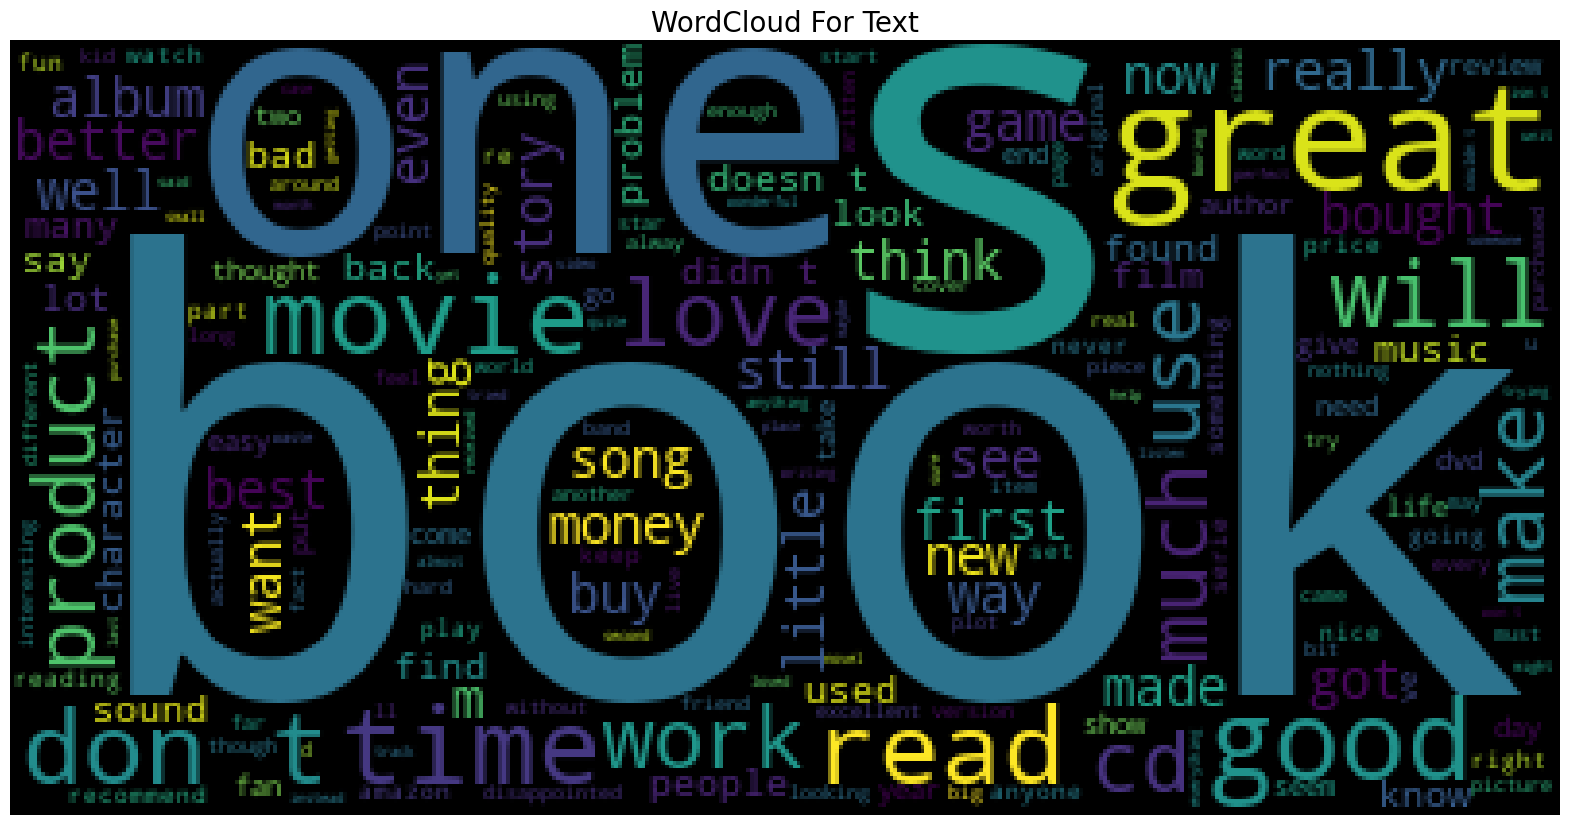

In [15]:
from wordcloud import WordCloud
text_concatenated = " ".join(df_train["processed_comments"].iloc[:20000])
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(text_concatenated))
plt.axis("off")
plt.title("WordCloud For Text",fontsize=20)
plt.show()

Model Creation: Using LSTM layers

In [16]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay, classification_report
from tensorflow.keras.optimizers import SGD, Adam
import bz2
import csv
from sklearn.metrics import roc_auc_score

max_words = 1000
max_sequence_length = 100

In [17]:
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df_train["processed_comments"])

X_train = tokenizer.texts_to_sequences(df_train["processed_comments"])
X_test = tokenizer.texts_to_sequences(df_test["processed_comments"])

X_train = pad_sequences(X_train, maxlen=max_sequence_length)
X_test = pad_sequences(X_test, maxlen=max_sequence_length)

In [18]:
X_train = np.array(X_train)
print(X_train.shape)
X_test = np.array(X_test)
print(X_test.shape)
y_train = np.array(df_train["label"])
print(y_train.shape)
y_test = np.array(df_test["label"])
print(y_test.shape)
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)

(256000, 100)
(80000, 100)
(256000,)
(80000,)


In [19]:
print(type(X_train[0]))
print(type(X_test[0]))
print(type(y_train[0]))
print(type(y_test[0]))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.int32'>
<class 'numpy.int32'>


In [20]:
def create_model(optimizer, activation_function, lstm_layers):
    model = Sequential()
    model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_sequence_length))
    for _ in range(lstm_layers):
        model.add(LSTM(128, return_sequences=True))
    model.add(LSTM(128, return_sequences=False))
    model.add(Dense(1, activation=activation_function))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Define different configurations
configurations = [
    {"optimizer": SGD(learning_rate=0.01), "activation_function": 'sigmoid', "lstm_layers": 1},
    {"optimizer": Adam(learning_rate=0.001), "activation_function": 'relu', "lstm_layers": 2},
]

results = []

for config in configurations:
    model = create_model(config["optimizer"], config["activation_function"], config["lstm_layers"])
    model.fit(X_train, y_train, epochs=5, batch_size=2048, verbose=1)
    loss, accuracy = model.evaluate(X_test, y_test)
    results.append({"config": config, "loss": loss, "accuracy": accuracy})

Epoch 1/5


C:\Users\2111s\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:86: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


125/125 ━━━━━━━━━━━━━━━━━━━━ 249s 2s/step - accuracy: 0.5129 - loss: 0.6931
Epoch 2/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 272s 2s/step - accuracy: 0.5124 - loss: 0.6931
Epoch 3/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 266s 2s/step - accuracy: 0.5206 - loss: 0.6930
Epoch 4/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 264s 2s/step - accuracy: 0.5238 - loss: 0.6930
Epoch 5/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 261s 2s/step - accuracy: 0.5299 - loss: 0.6930
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 73s 29ms/step - accuracy: 0.5288 - loss: 0.6930
Epoch 1/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 403s 3s/step - accuracy: 0.6191 - loss: 0.8436
Epoch 2/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 369s 3s/step - accuracy: 0.6987 - loss: 0.6138
Epoch 3/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 357s 3s/step - accuracy: 0.7346 - loss: 0.5279
Epoch 4/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 369s 3s/step - accuracy: 0.8387 - loss: 0.4057
Epoch 5/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 373s 3s/step - accuracy: 0.8396 - loss: 0.3948
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 97s 39ms/step - accuracy: 0.5015 - loss:

In [21]:
for result in results:
    config = result["config"]
    loss = result["loss"]
    accuracy = result["accuracy"]
    print(f"Configuration: Optimizer={config['optimizer']}, Activation={config['activation_function']}, LSTM Layers={config['lstm_layers']}")
    print(f"Test Loss: {loss}, Test Accuracy: {accuracy}\n")

Configuration: Optimizer=<keras.src.optimizers.sgd.SGD object at 0x000002071DEE7F50>, Activation=sigmoid, LSTM Layers=1
Test Loss: 0.6929624676704407, Test Accuracy: 0.528612494468689

Configuration: Optimizer=<keras.src.optimizers.adam.Adam object at 0x000002071DE940D0>, Activation=relu, LSTM Layers=2
Test Loss: 0.9111719727516174, Test Accuracy: 0.5012999773025513



In [22]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

2500/2500 ━━━━━━━━━━━━━━━━━━━━ 95s 38ms/step


Confusion Matrix:


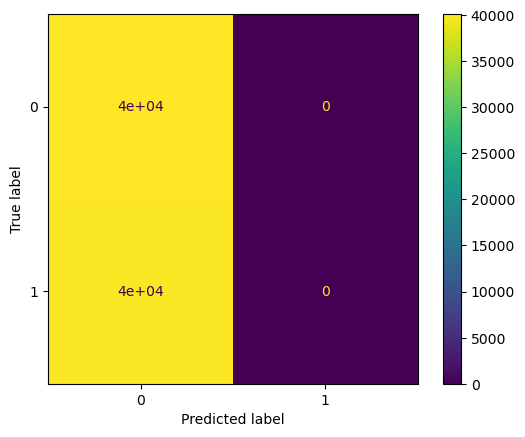

Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67     40104
           1       0.00      0.00      0.00     39896

    accuracy                           0.50     80000
   macro avg       0.25      0.50      0.33     80000
weighted avg       0.25      0.50      0.33     80000



C:\Users\2111s\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\2111s\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\2111s\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [23]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
ConfusionMatrixDisplay(cm).plot()
plt.show()

report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)